# 01_data_exploration.ipynb

### CIFAR-10 Dataset Exploration and Preprocessing

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
Train shape: (50000, 32, 32, 3)
Test shape: (10000, 32, 32, 3)


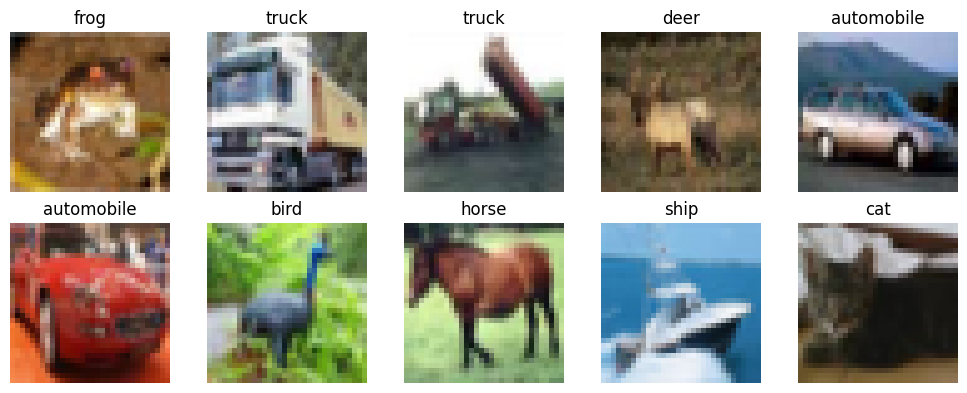

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import seaborn as sns

# Load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

# Show sample images
plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')
plt.tight_layout()
plt.show()

In [2]:
# Split data (70/15/15)
X_all = np.concatenate([X_train, X_test])
y_all = np.concatenate([y_train, y_test])
X_train, X_temp, y_train, y_temp = train_test_split(X_all, y_all, test_size=0.30, random_state=42, stratify=y_all)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)

print("Train:", X_train.shape, "Val:", X_val.shape, "Test:", X_test.shape)

Train: (42000, 32, 32, 3) Val: (9000, 32, 32, 3) Test: (9000, 32, 32, 3)


In [3]:
# Normalize and one-hot encode
X_train = X_train.astype('float32') / 255.0
X_val = X_val.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

y_train = to_categorical(y_train, 10)
y_val = to_categorical(y_val, 10)
y_test = to_categorical(y_test, 10)

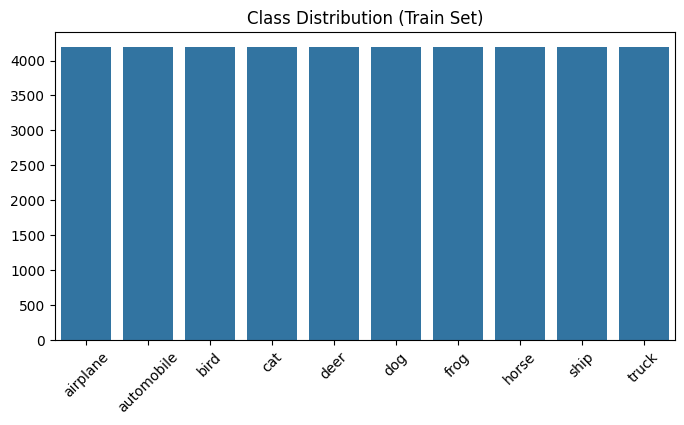

In [4]:
# Check class distribution
unique, counts = np.unique(np.argmax(y_train, axis=1), return_counts=True)
plt.figure(figsize=(8,4))
sns.barplot(x=[class_names[i] for i in unique], y=counts)
plt.title("Class Distribution (Train Set)")
plt.xticks(rotation=45)
plt.show()

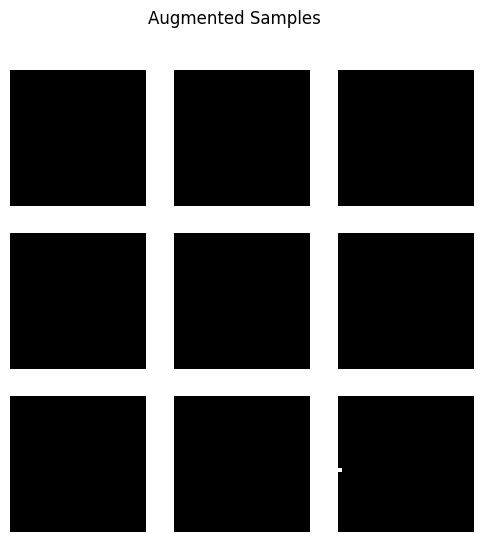

In [5]:
# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    horizontal_flip=True,
    zoom_range=0.1,
    brightness_range=[0.8, 1.2]
)
datagen.fit(X_train)

# Show augmented samples
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    plt.figure(figsize=(6,6))
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(X_batch[i])
        plt.axis('off')
    plt.suptitle("Augmented Samples")
    plt.show()
    break